In [12]:
## import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as sk_preprocessing
from sklearn import linear_model as sk_linear_model
from sklearn import metrics as sk_metrics
from matplotlib.pyplot import subplot, scatter, plot, axis, grid, figure, subplots

 ## Generate dataset

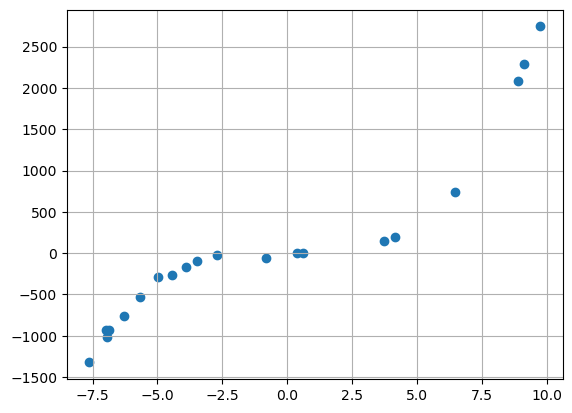

In [13]:
### This code block generates a test dataset based upon a ground truth function and some artifical noise. 
### Parameters: 
# number of datapoints 
n = 20; 
# minimum and maximum x value 
x_min = -10; 
x_max = 10; 
# standard deviation of the gaussian noise added
sigma = 25; 
# underlying ground truth function
def myFunc(x):
    y = 3*x*x*x - x + 5
    return y

### Code: 
# sample the random points for the dataset between x_min and x_max
x_sample = np.random.rand(n, 1)*(x_max - x_min) + x_min
# evaluate the ground truth function and add noise to the result 
y_sample = myFunc(x_sample) + np.random.normal(0, sigma, (n, 1))
# plot the dataset 
plt.scatter(x_sample, y_sample)
plt.grid(True)

 ## Split dataset into training and test

In [14]:
### Parameters: 
# define the size of the training set in percent. 
# Do not use too small or too high values as the remaining algorithms require to have a valid training and test dataset. 
training_perc = 70

### Code: 
# calculate which index splits the data into training and validation set 
idx_split = int(np.floor(n*training_perc/100))
if idx_split < 1: 
    print('Chosen training set is too small!\n')
if idx_split > (n-1): 
    print('Chosen training set is too big!\n')

# split the model into training and test sets
x_training = x_sample[1:idx_split]
x_test = x_sample[(idx_split+1):n]
y_training = y_sample[1:idx_split]
y_test = y_sample[(idx_split+1):n]
# generate equally spaced x values to plot the identified model later
x_plot = np.reshape(np.linspace(x_min, x_max, n), (n,1))

 ## Polynomial Regression with Ordinary Least Squares

In [15]:
def ols_regression(ols_PolyDegree, x_test, x_training, x_plot, y_test, y_training):
    # Create a preprocessing object for the given polynomial degree configuration
    ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree)
    
    # Create the design matrices for the test, the training and the plot points 
    ols_X_test = ols_poly.fit_transform(x_test)
    ols_X_training = ols_poly.fit_transform(x_training)
    ols_X_plot = ols_poly.fit_transform(x_plot)

    # Create linear regression object
    ols_regr = sk_linear_model.LinearRegression(fit_intercept=False)
    
    # Train the model based on the training design matrix and the training output data
    ols_regr.fit(ols_X_training, y_training)

    # Predict the output data for the training, the test and the plot points
    ols_y_pred_training = ols_regr.predict(ols_X_training)
    ols_y_pred_test = ols_regr.predict(ols_X_test)
    ols_y_plot = ols_regr.predict(ols_X_plot)

    # print the coefficients
    print('Coefficients: \n', ols_regr.coef_)
    # print the MSE for the training and the test dataset
    print("Mean squared error on the training dataset: %.2f"
          % sk_metrics.mean_squared_error(y_training, ols_y_pred_training))
    print("Mean squared error on the test dataset: %.2f"
          % sk_metrics.mean_squared_error(y_test, ols_y_pred_test))

    # Plot the results of the test dataset and the identified model based on the plot points
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_plot, ols_y_plot, color='blue', linewidth=3)
    plt.grid(True)
    
    return ols_y_plot

 ## Polynomial Regression with L2 Regularization ( Ridge Regression )

In [16]:
### Code
def ridge_regression(l2_PolyDegree, reg_lambda2, x_test, x_training, x_plot, y_test, y_training):
    # Create a preprocessing object for the given polynomial degree configuration
    ridge_poly = sk_preprocessing.PolynomialFeatures(l2_PolyDegree)
    
    # Create the design matrices for the test, the training and the plot points 
    ridge_X_test = ridge_poly.fit_transform(x_test)
    ridge_X_training = ridge_poly.fit_transform(x_training)
    ridge_X_plot = ridge_poly.fit_transform(x_plot)

    # Create linear regression object
    ridge_regr = sk_linear_model.Ridge(alpha=reg_lambda2, fit_intercept=False)
    
    # Train the model based on the training design matrix and the training output data
    ridge_regr.fit(ridge_X_training, y_training)

    # Predict the output data for the training, the test and the plot points
    ridge_y_pred_training = ridge_regr.predict(ridge_X_training)
    ridge_y_pred_test = ridge_regr.predict(ridge_X_test)
    ridge_y_plot = ridge_regr.predict(ridge_X_plot)

    # print the coefficients
    print('Coefficients: \n', ridge_regr.coef_)
    # print the MSE for the training and the test dataset
    print("Mean squared error on the training dataset: %.2f"
          % sk_metrics.mean_squared_error(y_training, ridge_y_pred_training))
    print("Mean squared error on the test dataset: %.2f"
          % sk_metrics.mean_squared_error(y_test, ridge_y_pred_test))

    # Plot the results of the test dataset and the identified model based on the plot points
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_plot, ridge_y_plot, color='blue', linewidth=3)
    plt.grid(True)

    return ridge_y_plot

 ## Polynomial Regression with L1 regularization ( Lasso Regression )

In [17]:
### Code
def lasso_regression(l1_PolyDegree, reg_lambda1, x_test, x_training, x_plot, y_test, y_training):
    # Create a preprocessing object for the given polynomial degree configuration
    lasso_poly = sk_preprocessing.PolynomialFeatures(l1_PolyDegree)
    
    # Create the design matrices for the test, the training and the plot points 
    lasso_X_test = lasso_poly.fit_transform(x_test)
    lasso_X_training = lasso_poly.fit_transform(x_training)
    lasso_X_plot = lasso_poly.fit_transform(x_plot)

    # Create linear regression object
    lasso_regr = sk_linear_model.Lasso(alpha=reg_lambda1, fit_intercept=False)
    
    # Train the model based on the training design matrix and the training output data
    lasso_regr.fit(lasso_X_training, y_training)

    # Predict the output data for the training, the test and the plot points
    lasso_y_pred_training = lasso_regr.predict(lasso_X_training)
    lasso_y_pred_test = lasso_regr.predict(lasso_X_test)
    lasso_y_plot = lasso_regr.predict(lasso_X_plot)

    # print the coefficients
    print('Coefficients: \n', lasso_regr.coef_)
    # print the MSE for the training and the test dataset
    print("Mean squared error on the training dataset: %.2f"
          % sk_metrics.mean_squared_error(y_training, lasso_y_pred_training))
    print("Mean squared error on the test dataset: %.2f"
          % sk_metrics.mean_squared_error(y_test, lasso_y_pred_test))

    # Plot the results of the test dataset and the identified model based on the plot points
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_plot, lasso_y_plot, color='blue', linewidth=3)
    plt.grid(True)
    
    return lasso_y_plot

 ## Comparison of Polynomial Regression Algorithms

Coefficients: 
 [[-2.09154438e+01 -5.84628055e+00  1.58470946e+00  3.20610538e+00
  -1.29100075e-02 -2.01545809e-03]]
Mean squared error on the training dataset: 818.07
Mean squared error on the test dataset: 1781.79


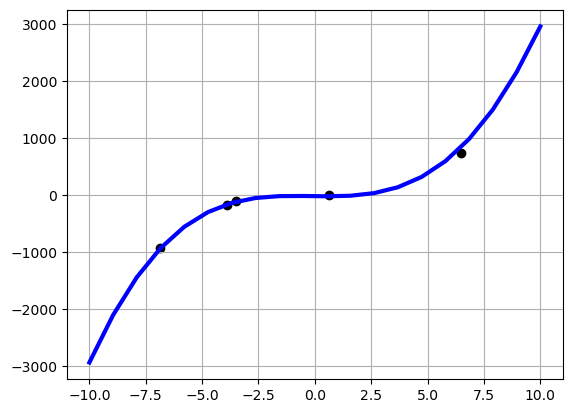

In [18]:
### Parameters: 
ols_PolyDegree = 5
### apply OLS regression
ols_y_plot = ols_regression(ols_PolyDegree, x_test, x_training, x_plot, y_test, y_training)

Coefficients: 
 [[-1.01492992e+00 -1.44526987e+00  4.28723918e-01  3.02208169e+00
  -1.21960851e-03 -6.11505501e-04]]
Mean squared error on the training dataset: 924.26
Mean squared error on the test dataset: 1258.12


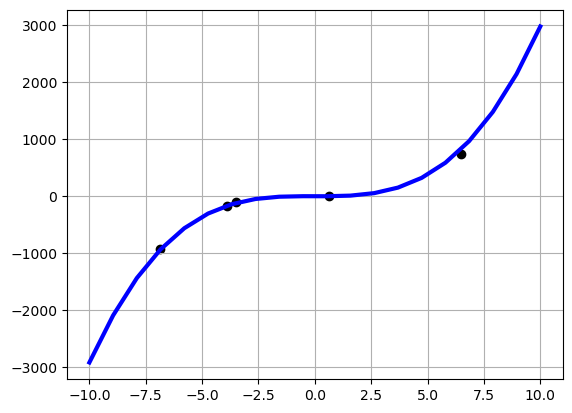

In [19]:
### Parameters: 
l2_PolyDegree = 5
reg_lambda2 = 50
### apply ridge regression
ridge_y_plot = ridge_regression(l2_PolyDegree, reg_lambda2, x_test, x_training, x_plot, y_test, y_training)

Coefficients: 
 [-2.12457330e+01 -5.38980941e+00  1.66133710e+00  3.18188900e+00
 -1.43863367e-02 -1.73132914e-03]
Mean squared error on the training dataset: 818.56
Mean squared error on the test dataset: 1778.59


c:\Users\go25pux\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.353e+03, tolerance: 2.069e+03
  model = cd_fast.enet_coordinate_descent(


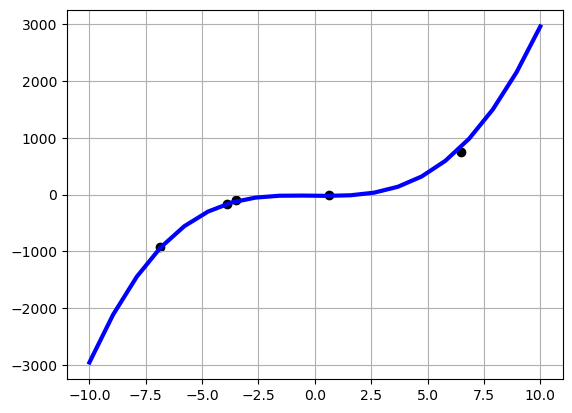

In [20]:
### Parameters: 
l1_PolyDegree = 5
reg_lambda1 = 0.1
### apply lasso regression
lasso_y_plot = lasso_regression(l1_PolyDegree, reg_lambda1, x_test, x_training, x_plot, y_test, y_training)

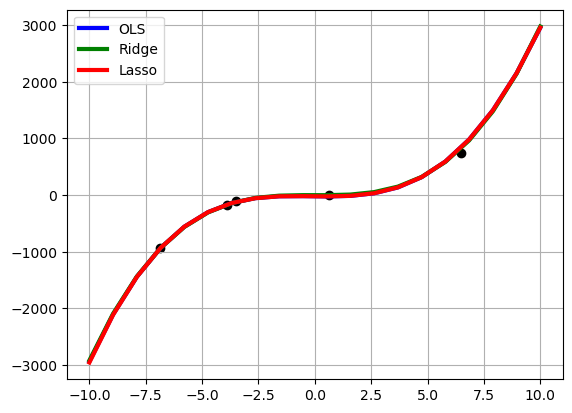

In [21]:
# plot and compare data 
plt.scatter(x_test, y_test, color='black')
plt.plot(x_plot, ols_y_plot, color='blue', linewidth=3, label='OLS')
plt.plot(x_plot, ridge_y_plot, color='green', linewidth=3, label='Ridge')
plt.plot(x_plot, lasso_y_plot, color='red', linewidth=3, label='Lasso')
plt.grid(True)
plt.legend()

# Powertrain Example

In [22]:
# read data from csv 
data = np.genfromtxt('./data/powertrain_data.csv', delimiter=',');
# map input data to meaningful variables
PowertrainForce_N = np.reshape(data[1:,0], (len(data)-1,1));
LongAcceleration_mps2 = np.reshape(data[1:,1], (len(data)-1,1));
LongVelocity_mps = np.reshape(data[1:,2], (len(data)-1,1));

 ## Visualize Data

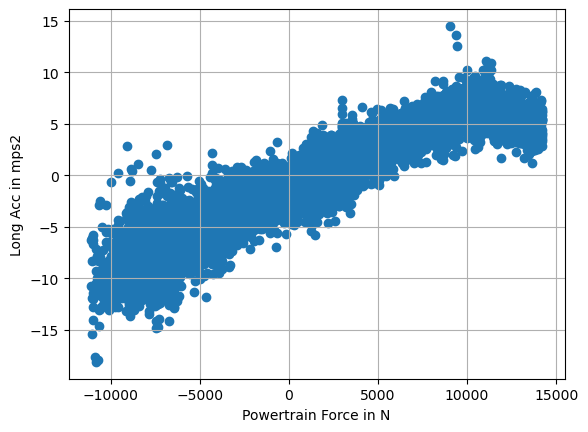

In [23]:
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

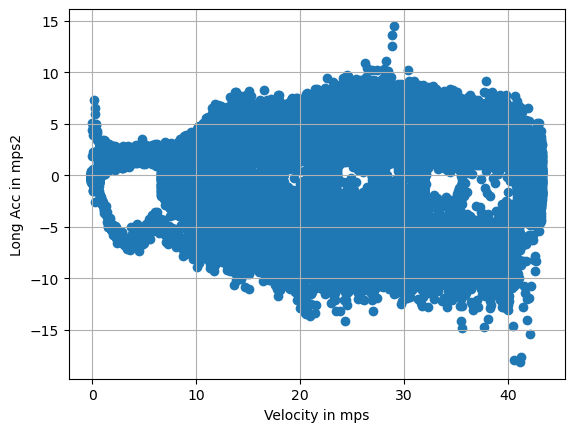

In [24]:
plt.scatter(LongVelocity_mps, LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

 ## Apply standard regression
 $$a_x = c_1F_{\mathrm{PT}} + c_0$$
 $$a_x = \frac{1}{m}F_{\mathrm{PT}}$$

Coefficients: 
 [[-0.58698156  0.00067902]]
Vehicle mass:  1472.7197222291265 kg


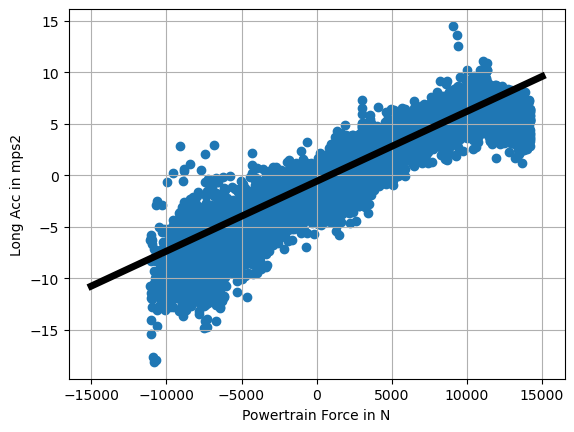

In [25]:
ols_PolyDegree = 1; 
ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree);
ols_X_training = ols_poly.fit_transform(PowertrainForce_N);
ols_regr = sk_linear_model.LinearRegression(fit_intercept=False);
ols_regr.fit(ols_X_training, LongAcceleration_mps2);

## visualize results
PowertrainTestForce_N = np.reshape(np.linspace(-15000, 15000, 100), (100,1));
ols_X_plot = ols_poly.fit_transform(PowertrainTestForce_N);
ols_y_plot = ols_regr.predict(ols_X_plot);
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.plot(PowertrainTestForce_N, ols_y_plot, color='black', linewidth=5)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');
print('Coefficients: \n', ols_regr.coef_)

## calculate vehicle mass
print('Vehicle mass: ', 1/ols_regr.coef_[0,1], 'kg')

 ## Evaluate residuals

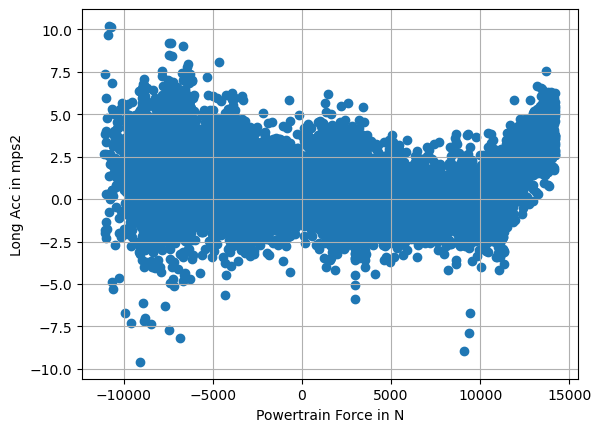

In [26]:
plt.scatter(PowertrainForce_N, ols_regr.predict(ols_X_training)-LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

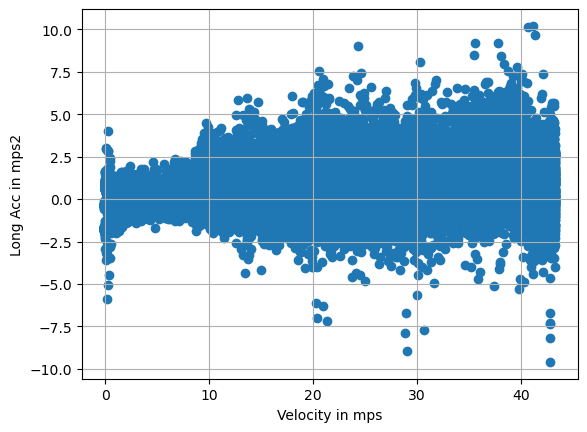

In [27]:
plt.scatter(LongVelocity_mps, ols_regr.predict(ols_X_training)-LongAcceleration_mps2)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

 ## Remove outliers

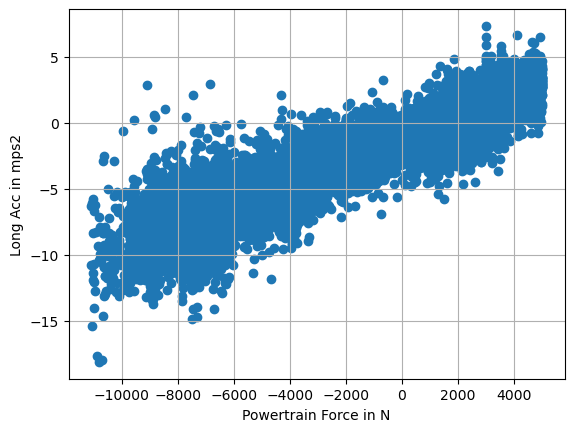

In [28]:
# get relevant data point indices
idx = np.where((PowertrainForce_N < 5000));
PowertrainForce_N_red = PowertrainForce_N[idx];
LongAcceleration_mps2_red = LongAcceleration_mps2[idx];
LongVelocity_mps_red = LongVelocity_mps[idx];
plt.scatter(PowertrainForce_N_red, LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

 ## Apply regression

 $$a_x = c_1F_{\mathrm{PT}} + c_0$$
 $$a_x = \frac{1}{m}F_{\mathrm{PT}}$$

Coefficients: 
 [-0.55623202  0.00071874]
Vehicle mass:  1391.3252581130298 kg


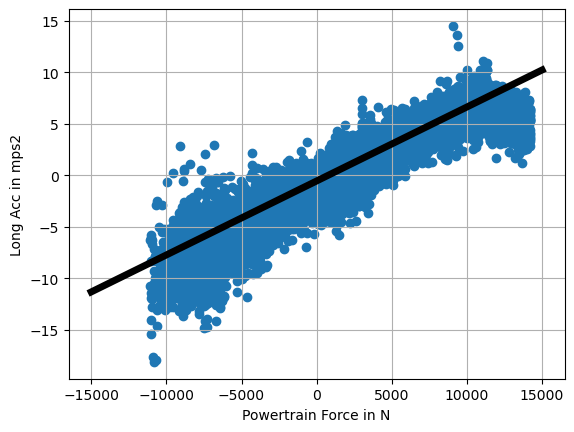

In [29]:
ols_PolyDegree = 1; 
ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree);
ols_X_training_red = ols_poly.fit_transform(np.reshape(PowertrainForce_N_red, (len(PowertrainForce_N_red),1)));
ols_regr_out = sk_linear_model.LinearRegression(fit_intercept=False);
ols_regr_out.fit(ols_X_training_red, LongAcceleration_mps2_red);

## visualize results
PowertrainTestForce_N = np.reshape(np.linspace(-15000, 15000, 100), (100,1));
ols_X_plot = ols_poly.fit_transform(PowertrainTestForce_N);
ols_y_plot = ols_regr_out.predict(ols_X_plot);
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.plot(PowertrainTestForce_N, ols_y_plot, color='black', linewidth=5)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');
print('Coefficients: \n', ols_regr_out.coef_)

## calculate vehicle mass
print('Vehicle mass: ', 1/ols_regr_out.coef_[1], 'kg')

 ## Evaluate residuals

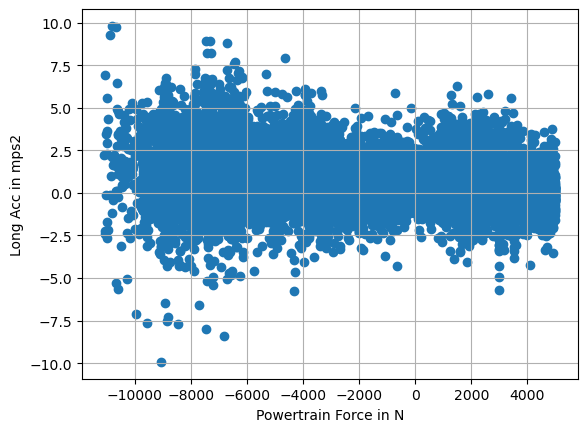

In [30]:
plt.scatter(PowertrainForce_N_red, ols_regr_out.predict(ols_X_training_red)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

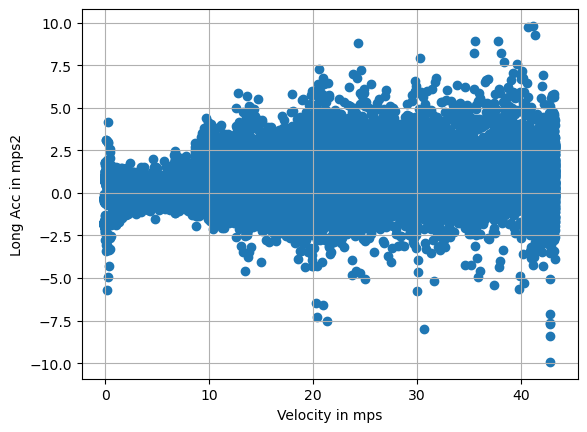

In [31]:
plt.scatter(LongVelocity_mps_red, ols_regr_out.predict(ols_X_training_red)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

 ## Apply regression with velocity as additional input

 $$a_x = c_1F_{\mathrm{PT}} + c_2v^2$$
 $$a_x = \frac{1}{m}\left(F_{\mathrm{PT}} + c_wv^2\right)$$

Coefficients: 
 [ 0.00071965 -0.00135717]
Vehicle mass:  1389.5669465521155 kg


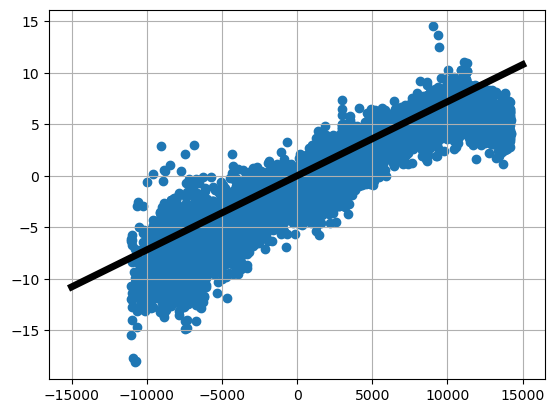

In [32]:
ols_PolyDegree = 1; 
ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree);
# form matrix with feature vectors 
InputMatrix = np.concatenate((np.reshape(PowertrainForce_N_red, (len(PowertrainForce_N_red),1)), np.reshape(LongVelocity_mps_red**2, (len(LongVelocity_mps_red),1))), axis=1);
ols_regr_vel = sk_linear_model.LinearRegression(fit_intercept=False);
ols_regr_vel.fit(InputMatrix, LongAcceleration_mps2_red);

## visualize results
PowertrainTestForce_N = np.reshape(np.linspace(-15000, 15000, 100), (100,1));
PowertrainTestVelocity_N = np.zeros((100,1));
ols_X_plot = np.concatenate((np.reshape(PowertrainTestForce_N, (len(PowertrainTestForce_N),1)), np.reshape(PowertrainTestVelocity_N**2, (len(PowertrainTestVelocity_N),1))), axis=1);
ols_y_plot = ols_regr_vel.predict(ols_X_plot);
plt.scatter(PowertrainForce_N, LongAcceleration_mps2)
plt.plot(PowertrainTestForce_N, ols_y_plot, color='black', linewidth=5)
plt.grid(True)
print('Coefficients: \n', ols_regr_vel.coef_)

## calculate vehicle mass
print('Vehicle mass: ', 1/ols_regr_vel.coef_[0], 'kg')

 ## Evaluate residuals

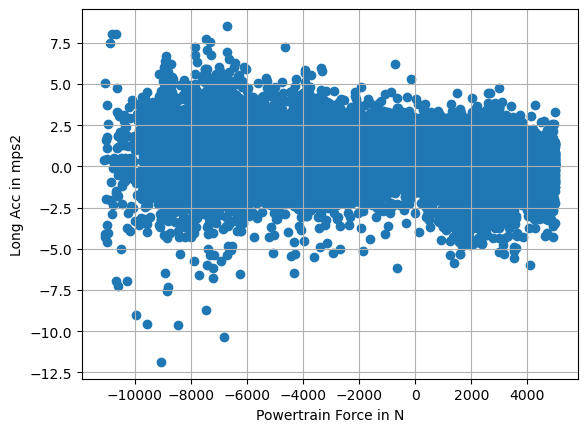

In [33]:
plt.scatter(PowertrainForce_N_red, ols_regr_vel.predict(InputMatrix)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Powertrain Force in N');
plt.ylabel('Long Acc in mps2');

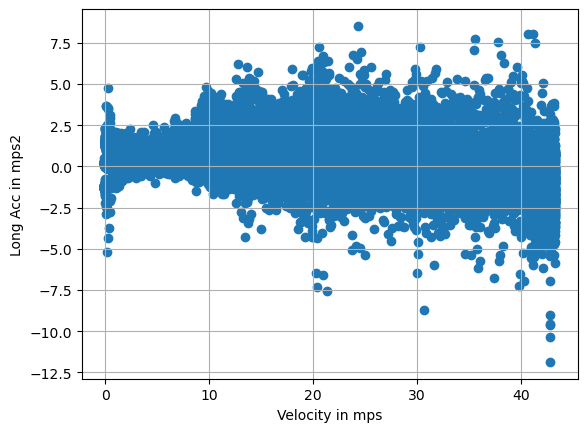

In [34]:
plt.scatter(LongVelocity_mps_red, ols_regr_vel.predict(InputMatrix)-LongAcceleration_mps2_red)
plt.grid(True)
plt.xlabel('Velocity in mps');
plt.ylabel('Long Acc in mps2');

In [35]:
# Anscombes quartet can be found on Wikepedia 
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
# Definition of the dataset:

x1 = np.array([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
y1 = np.array([8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
y2 = np.array([9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74])
x3 = np.array([10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73])
x4 = np.array([8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

 ### Basic visual analysis of the dataset

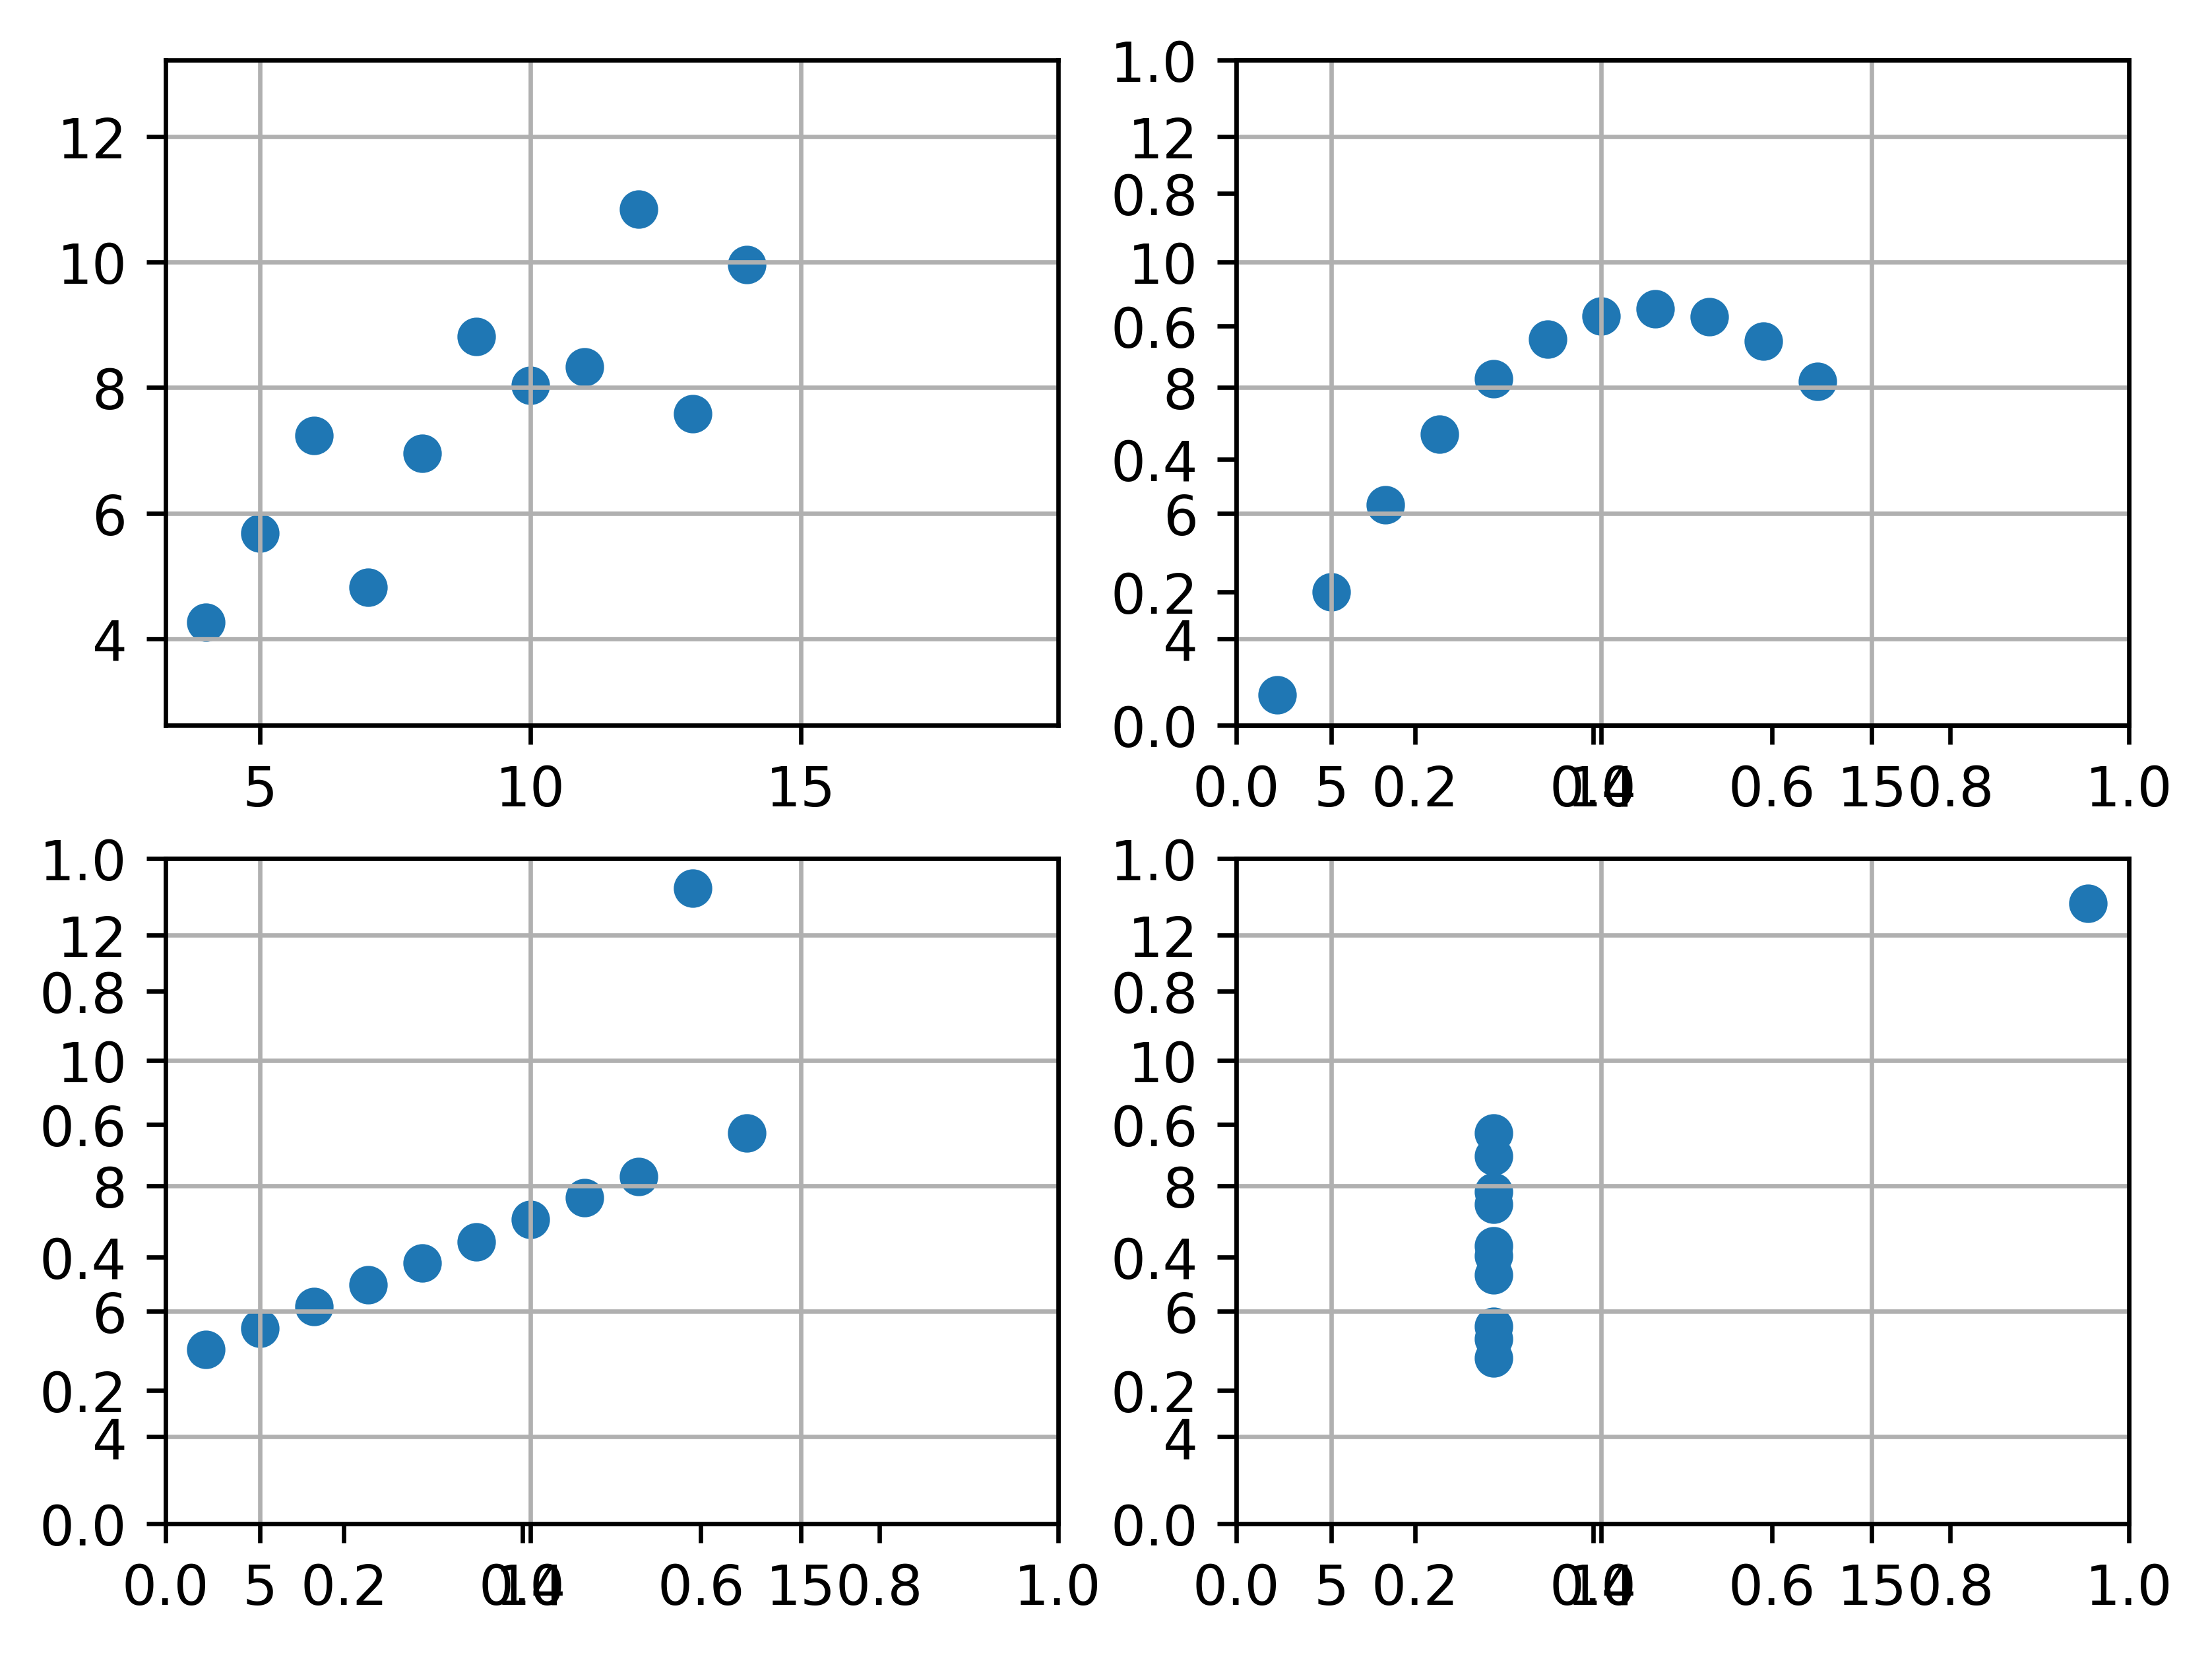

In [36]:
# visualize dataset to gain some insight on whats going on 
f, axs = subplots(2,2,dpi=600)
ax1 = subplot(2, 2, 1)
scatter(x1, y1)
grid()
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x2, y2)
grid()
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x3, y3)
grid()
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4, y4)
grid()

In [37]:
# The intersting thing about Anscombes Quartet is
# that the datasets look very different from a graphical point of view 
# but are nearly similar from a basic statistics point of view. 
meanValues = np.array([np.mean(y1), np.mean(y2), np.mean(y3), np.mean(y4)])
print("The mean values are {0:5.3f}, {1:5.3f}, {2:5.3f} and {3:5.3f}".format(meanValues[0], meanValues[1], meanValues[2], meanValues[3]))
stdValues = np.array([np.std(y1), np.std(y2), np.std(y3), np.std(y4)])
print("The standard deviations are {0:5.3f}, {1:5.3f}, {2:5.3f} and {3:5.3f}".format(stdValues[0], stdValues[1], stdValues[2], stdValues[3]))
corrValues = np.array([np.corrcoef(x1, y1)[0,1], np.corrcoef(x2, y2)[0,1], np.corrcoef(x3, y3)[0,1], np.corrcoef(x4, y4)[0,1]])
print("The correlation coefficients are {0:5.3f}, {1:5.3f}, {2:5.3f} and {3:5.3f}".format(corrValues[0], corrValues[1], corrValues[2], corrValues[3]))

The mean values are 7.501, 7.501, 7.500 and 7.501
The standard deviations are 1.937, 1.937, 1.936 and 1.936
The correlation coefficients are 0.816, 0.816, 0.816 and 0.817


 ###### Short summary of what we've seen so far
 We have seen that the collection of four datasets called Anscombes Quartet looks very different from a visual point of view. However, applying basic statistic measures leads to the conclusion that the datasets are indeed very similar. This was exactly the intention for the formulation of this dataset. It was designed to emphasize the importance of visualization during statistical work with real world data. Furthermore, we can see that outliers can significantly reduce performance of basic statistic methods.

 ### Regression on that dataset

In [38]:
# create polynomial features for all datasets using linear and quadratic functions 
polydeg1 = sk_preprocessing.PolynomialFeatures(1)
polydeg2 = sk_preprocessing.PolynomialFeatures(2)

# create design matrices for all datasets
# reshape is necessary to create 2D array from 1D array 
ds1_pd1_x = polydeg1.fit_transform(x1.reshape(-1,1))
ds2_pd1_x = polydeg1.fit_transform(x2.reshape(-1,1))
ds3_pd1_x = polydeg1.fit_transform(x3.reshape(-1,1))
ds4_pd1_x = polydeg1.fit_transform(x4.reshape(-1,1))
ds1_pd2_x = polydeg2.fit_transform(x1.reshape(-1,1))
ds2_pd2_x = polydeg2.fit_transform(x2.reshape(-1,1))
ds3_pd2_x = polydeg2.fit_transform(x3.reshape(-1,1))
ds4_pd2_x = polydeg2.fit_transform(x4.reshape(-1,1))

# create regression model objects 
ds1_pd1_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds2_pd1_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds3_pd1_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds4_pd1_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds1_pd2_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds2_pd2_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds3_pd2_reg = sk_linear_model.LinearRegression(fit_intercept=False)
ds4_pd2_reg = sk_linear_model.LinearRegression(fit_intercept=False)

# Train the models based on the training design matrix and the training output data
ds1_pd1_reg.fit(ds1_pd1_x, y1)
ds2_pd1_reg.fit(ds2_pd1_x, y2)
ds3_pd1_reg.fit(ds3_pd1_x, y3)
ds4_pd1_reg.fit(ds4_pd1_x, y4)
ds1_pd2_reg.fit(ds1_pd2_x, y1)
ds2_pd2_reg.fit(ds2_pd2_x, y2)
ds3_pd2_reg.fit(ds3_pd2_x, y3)
ds4_pd2_reg.fit(ds4_pd2_x, y4)

# Predict the output data for the evaluation points 
x_eval = np.linspace(0, 20, num=20)
ds1_pd1_x_eval = polydeg1.fit_transform(x_eval.reshape(-1,1))
ds2_pd1_x_eval = polydeg1.fit_transform(x_eval.reshape(-1,1))
ds3_pd1_x_eval = polydeg1.fit_transform(x_eval.reshape(-1,1))
ds4_pd1_x_eval = polydeg1.fit_transform(x_eval.reshape(-1,1))
ds1_pd2_x_eval= polydeg2.fit_transform(x_eval.reshape(-1,1))
ds2_pd2_x_eval = polydeg2.fit_transform(x_eval.reshape(-1,1))
ds3_pd2_x_eval = polydeg2.fit_transform(x_eval.reshape(-1,1))
ds4_pd2_x_eval = polydeg2.fit_transform(x_eval.reshape(-1,1))

ds1_pd1_y_eval = ds1_pd1_reg.predict(ds1_pd1_x_eval)
ds2_pd1_y_eval = ds2_pd1_reg.predict(ds2_pd1_x_eval)
ds3_pd1_y_eval = ds3_pd1_reg.predict(ds3_pd1_x_eval)
ds4_pd1_y_eval = ds4_pd1_reg.predict(ds4_pd1_x_eval)
ds1_pd2_y_eval = ds1_pd2_reg.predict(ds1_pd2_x_eval)
ds2_pd2_y_eval = ds2_pd2_reg.predict(ds2_pd2_x_eval)
ds3_pd2_y_eval = ds3_pd2_reg.predict(ds3_pd2_x_eval)
ds4_pd2_y_eval = ds4_pd2_reg.predict(ds4_pd2_x_eval)

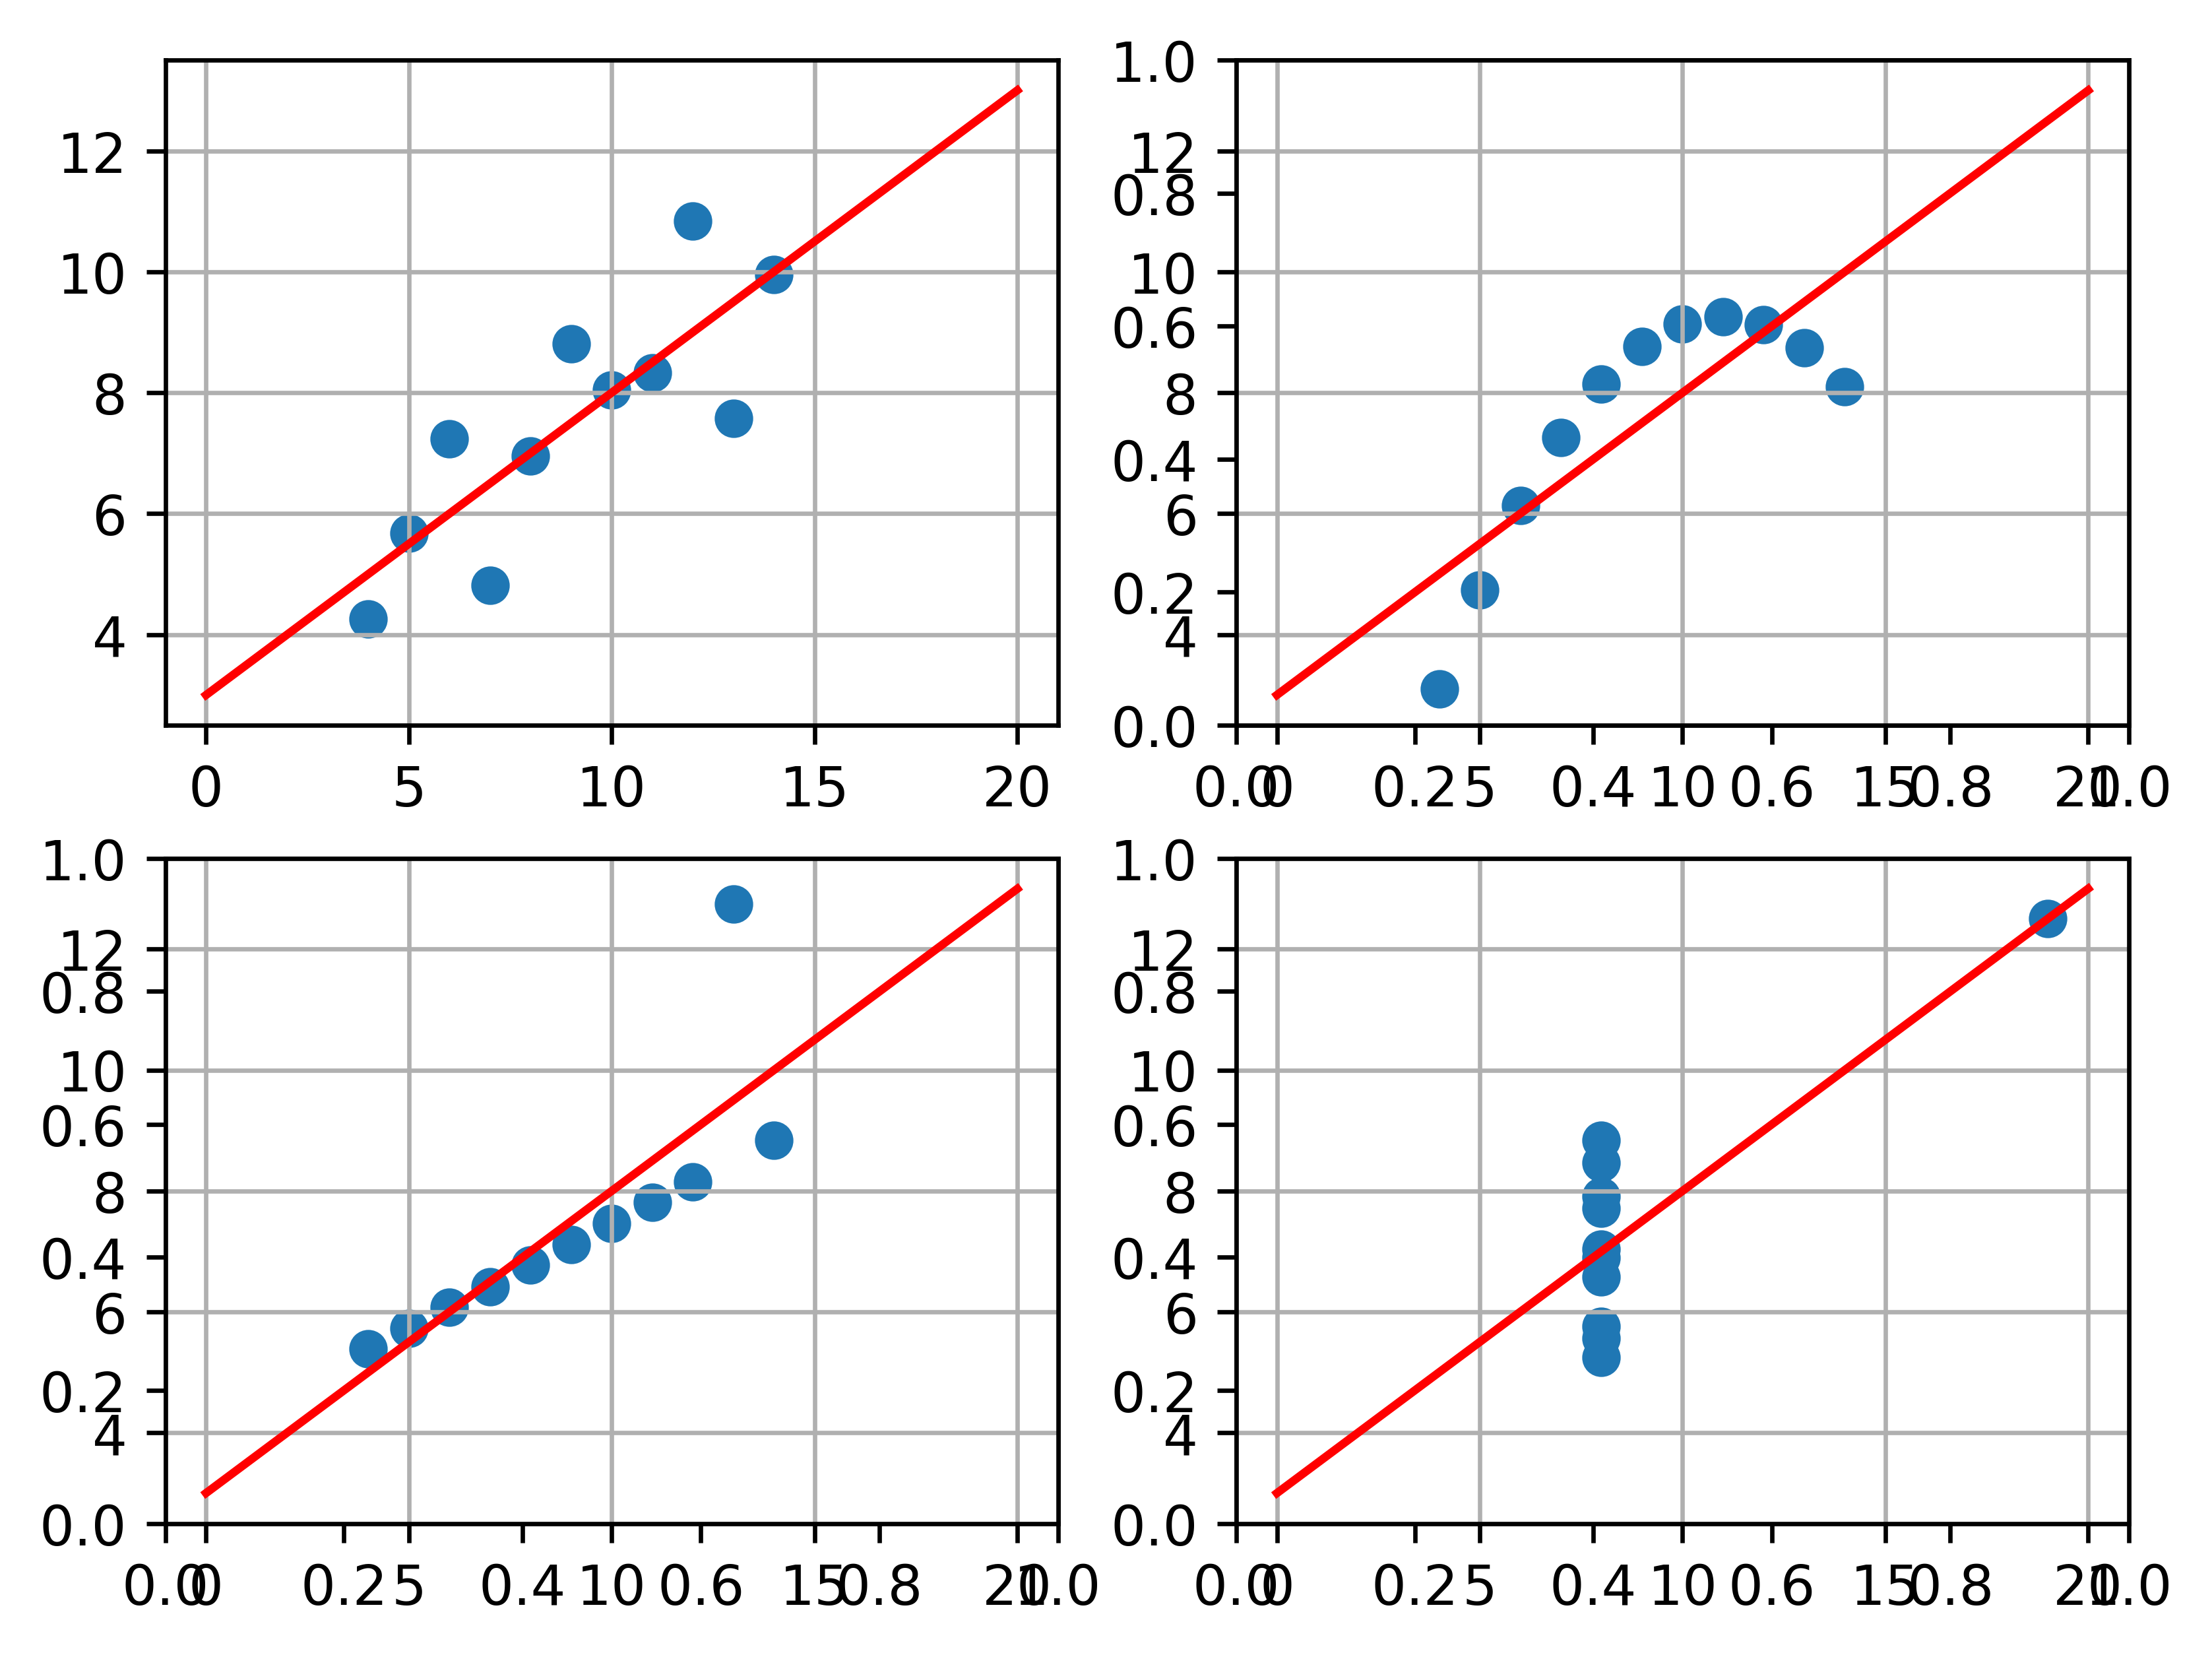

In [39]:
# visualize linear fits 
f, axs = subplots(2,2,dpi=600)
ax1 = subplot(2, 2, 1)
scatter(x1, y1)
grid()
plot(x_eval, ds1_pd1_y_eval,'r')
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x2, y2)
grid()
plot(x_eval, ds2_pd1_y_eval,'r')
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x3, y3)
grid()
plot(x_eval, ds3_pd1_y_eval,'r')
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4, y4)
grid()
plot(x_eval, ds4_pd1_y_eval,'r')

 ## Comments on the results

 We have pointed out before, that the basic statistics of all four datasets are nearly equal. Why this might not be a problem in some applications, applying a purely linear model to the dataset shows that this can lead to severe problems. From a visual perspective, everyone would agree that some of the models do not represent the data at all. However, they are optimal in a sense that they minimize the loss function. The quartet therefore emphasizes the importance of data visualization especially if the amount and type of outliers and general behavior of the data is unknown! Furthermore, these datasets can be viewed as warning examples when applying regression methods online in fully autonomos machines. The algorithms have to be capable of dealing with such situations if they may occur.

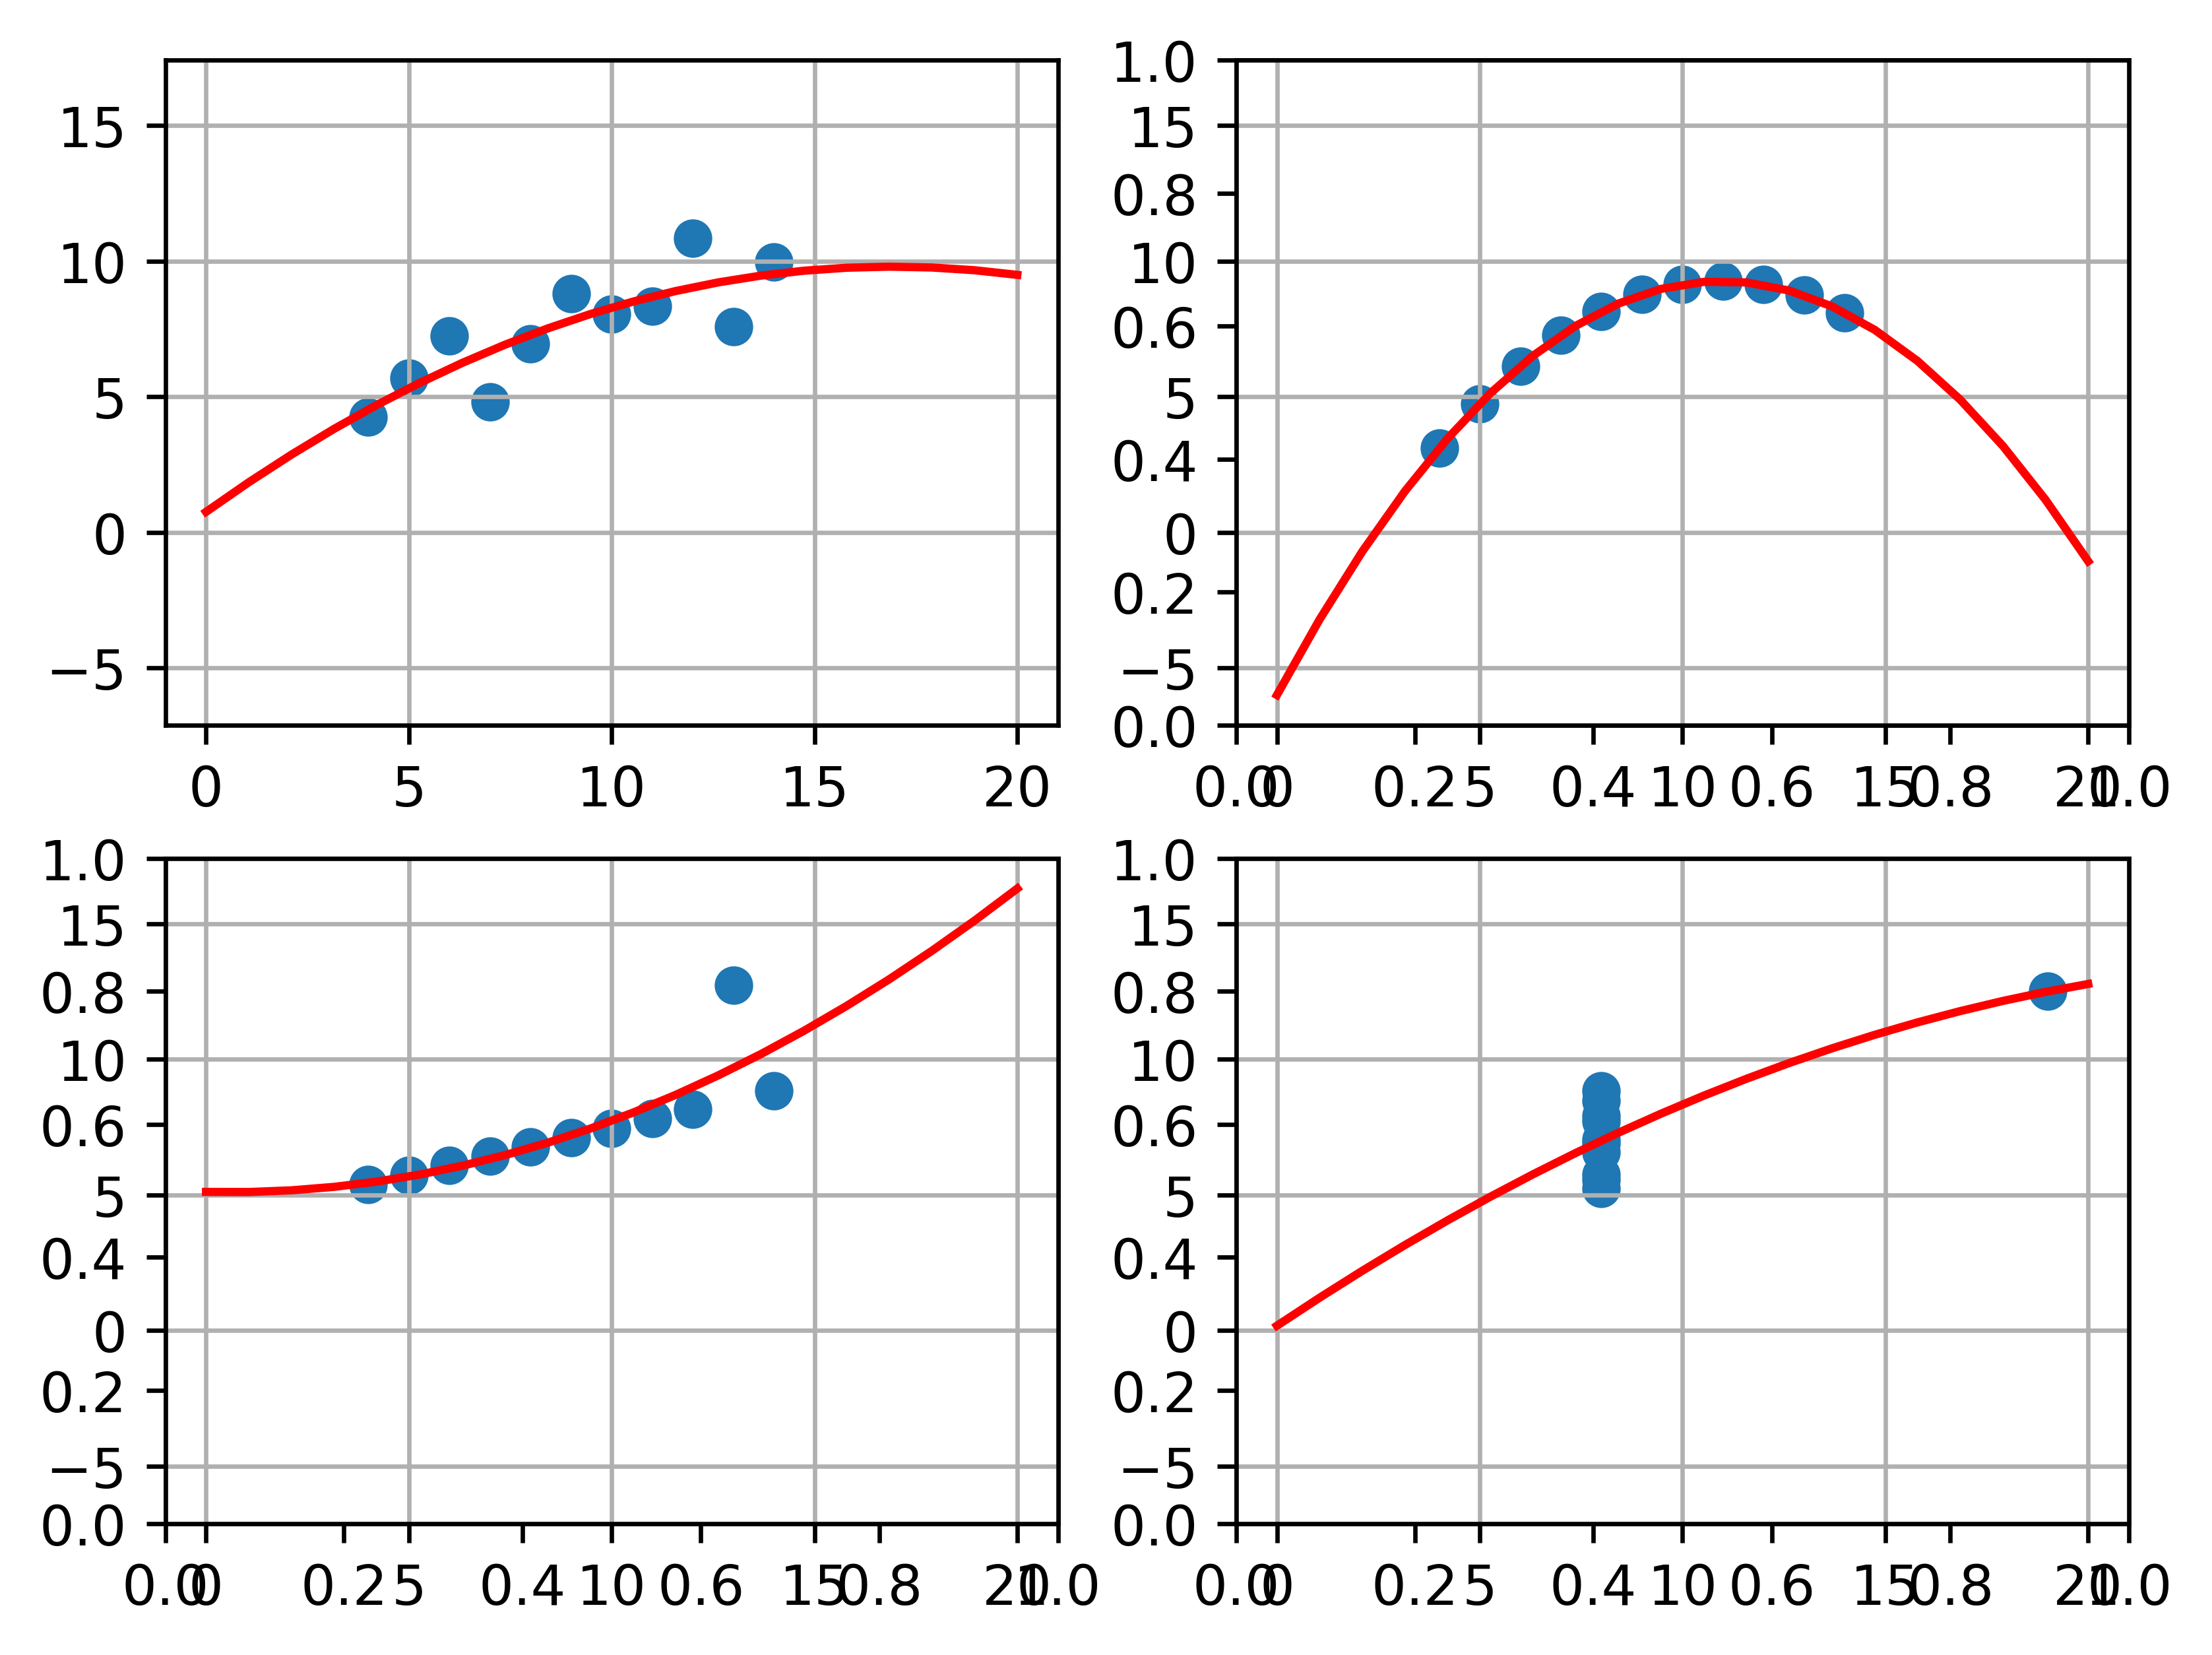

In [40]:
# visualize quadratic fits 
f, axs = subplots(2,2,dpi=600)
ax1 = subplot(2, 2, 1)
scatter(x1, y1)
grid()
plot(x_eval, ds1_pd2_y_eval,'r')
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x2, y2)
grid()
plot(x_eval, ds2_pd2_y_eval,'r')
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x3, y3)
grid()
plot(x_eval, ds3_pd2_y_eval,'r')
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4, y4)
grid()
plot(x_eval, ds4_pd2_y_eval,'r')